In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

In [5]:
df = yf.download('^GSPC', start = '2010-01-01')
df

c:\Users\Master\anaconda3\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2024-10-21,5857.819824,5866.919922,5824.790039,5853.979980,5853.979980,3407010000
2024-10-22,5832.700195,5863.040039,5821.169922,5851.200195,5851.200195,3342080000
2024-10-23,5834.500000,5834.850098,5762.410156,5797.419922,5797.419922,3532650000


<Axes: title={'center': 'S&P500 Price'}, xlabel='Date'>

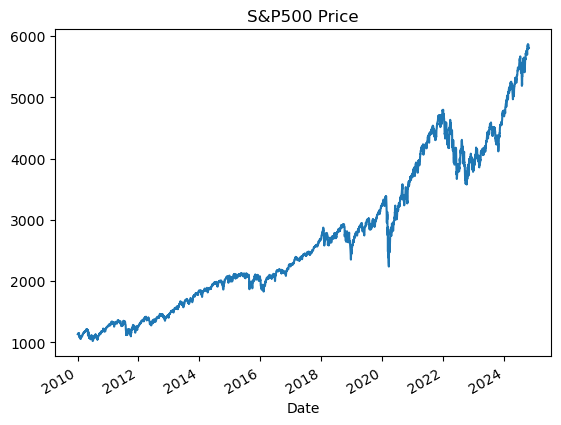

In [10]:
## Plotting
df.Close.plot(title = "S&P500 Price", x='Date', y='Close')

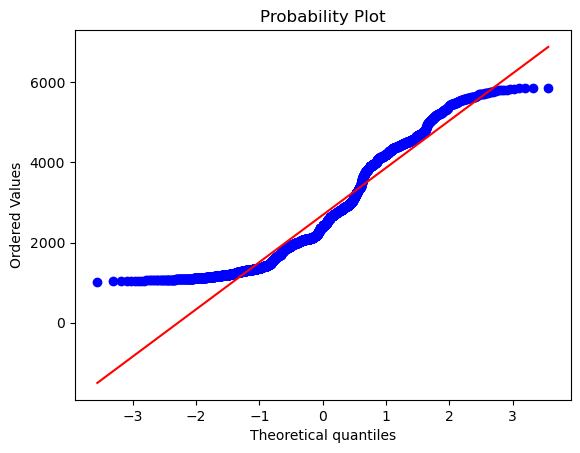

In [11]:
## 정규확률그림
scipy.stats.probplot(df.Close, plot = plt)
plt.show()

정규분포를 따르지 않음

## 백색잡음

<Axes: xlabel='Date'>

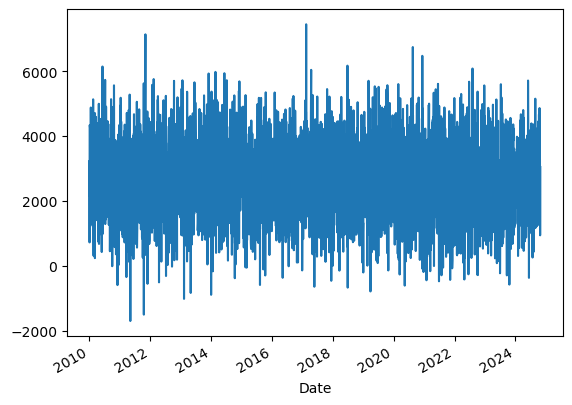

In [20]:
wn = np.random.normal(df['Close'].mean(), scale = df['Close'].std(),size = len(df))
df["wn"]=wn

df["wn"].plot()

In [21]:
# 이동 평균을 사용한 추세선 추가 (예: 10일 이동 평균)
df["trend"] = df["Close"].rolling(window=10).mean()

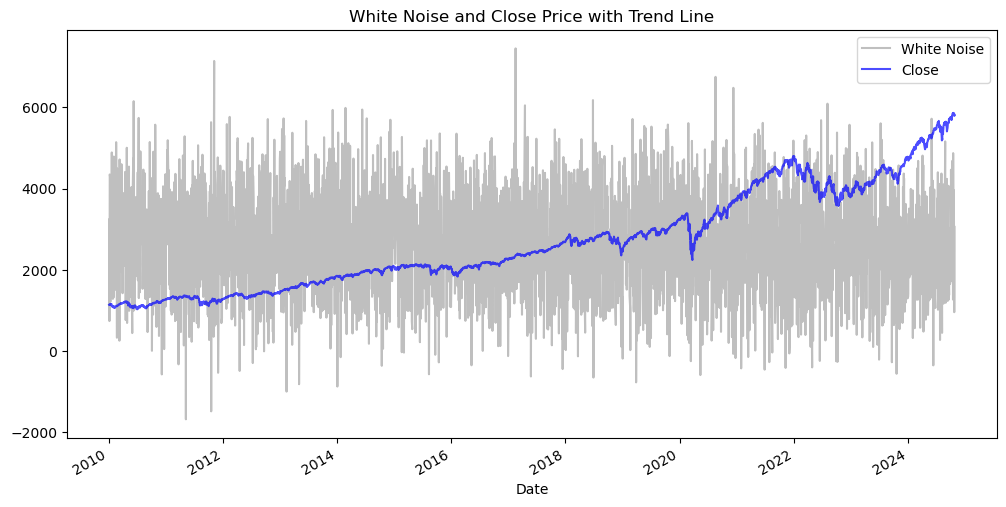

In [23]:
# 화이트 노이즈 및 추세선 플로팅
plt.figure(figsize=(12, 6))
df["wn"].plot(label="White Noise", color="gray", alpha=0.5)   # 화이트 노이즈
df["Close"].plot(label="Close", color="blue", alpha=0.7)      # Close 가격
# df["trend"].plot(label="Trend (10-day MA)", color="red", linewidth=2)  # 추세선

# 그래프 제목 및 범례 추가
plt.title("White Noise and Close Price with Trend Line")
plt.legend()
plt.show()

정상성 확인

In [24]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['wn'])  # 백색잡음은 p-value 0으로 정상성을 따름

(-36.94539152567619,
 0.0,
 2,
 3726,
 {'1%': -3.4321062562589564,
  '5%': -2.86231601696815,
  '10%': -2.5671830847803467},
 63042.16545148796)

In [25]:
adfuller(df['Close'])   # Close 종가는 p-value 0.996으로 비정상성을 따름

(1.2239360351290285,
 0.9961471572729023,
 27,
 3701,
 {'1%': -3.4321181278924793,
  '5%': -2.86232126099387,
  '10%': -2.567185876515552},
 35831.91573595819)

ACF, PACF 확인

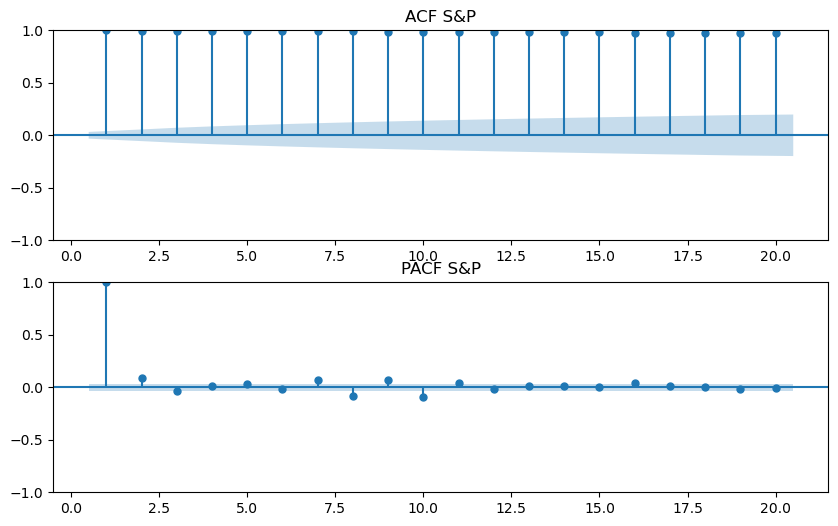

In [40]:
import statsmodels.graphics.tsaplots as sgt 

## Close
fig = plt.figure(figsize=[10, 6])
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df['Close'], lags = 20, zero = False, ax=ax1)
ax1.set_title("ACF S&P")

sgt.plot_pacf(df['Close'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("PACF S&P")

plt.show()

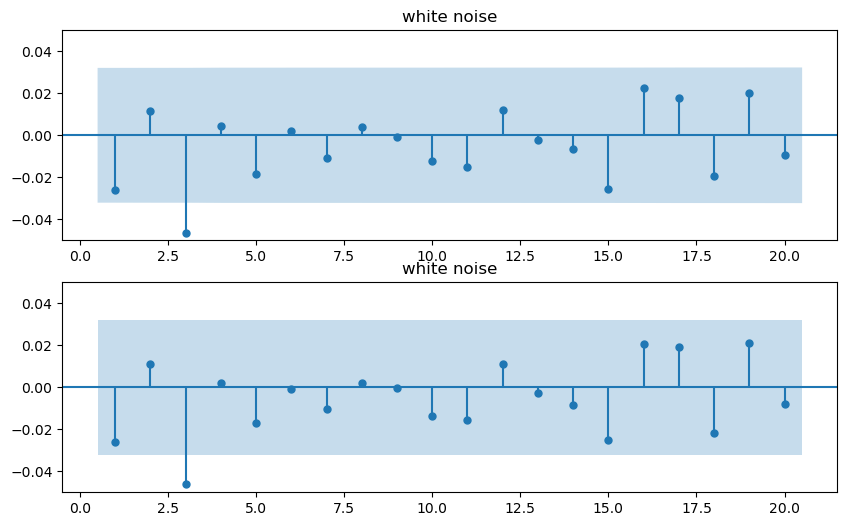

In [39]:
## White Noise
fig = plt.figure(figsize = [10, 6])
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

sgt.plot_acf(df['wn'], lags = 20, zero = False, ax=ax1)
ax1.set_title("white noise")
ax1.set_ylim(-0.05, 0.05)  # y축 범위 설정


sgt.plot_pacf(df['wn'], lags = 20, zero = False, method = ('ols'), ax=ax2)
ax2.set_title("white noise")
ax2.set_ylim(-0.05, 0.05)  # y축 범위 설정

plt.show()

- white noise의 경우 각 lag에서 서로 관련이 없음
- 이는 시차간에 correlation이 없어야 하는 white noise의 성질을 만족

### AR model

In [48]:
### AR model
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2

##AR(1)
# model_ar_1 = ARMA(df["Close"], order = (1,0))
# result_ar_1 = model_ar_1.fit()
# result_ar_1.summary()

In [53]:
model = ARIMA(df["Close"], order = (1,0,0))
result = model.fit()
result.summary()

c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3729
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -18125.630
Date:                Sun, 27 Oct 2024   AIC                          36257.259
Time:                        14:51:57   BIC                          36275.931
Sample:                             0   HQIC                         36263.902
                               - 3729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2689.5245   1772.079      1.518      0.129    -783.687    6162.736
ar.L1          0.9998      0.000   2375.195      0.000       0.999       1.001
sigma2       974.0231      8.957    108.743      0.000     956.467     991.579
===================================================================================
Ljung-Box (L1) (Q):                  27.36   Jarque-Bera (JB):             19037.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              12.86   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
model_1 = ARIMA(df["Close"], order = (2,0,0))
result_1 = model_1.fit()
result_1.summary()

c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3729
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -18112.269
Date:                Sun, 27 Oct 2024   AIC                          36232.537
Time:                        14:55:14   BIC                          36257.433
Sample:                             0   HQIC                         36241.394
                               - 3729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2689.3447   5257.114      0.512      0.609   -7614.410     1.3e+04
ar.L1          0.9157      0.007    128.796      0.000       0.902       0.930
ar.L2          0.0842      0.007     11.821      0.000       0.070       0.098
sigma2       966.9068      9.483    101.960      0.000     948.320     985.494
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             16667.27
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):              12.79   Skew:                            -0.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
df['Close']

Date
2010-01-04    1132.989990
2010-01-05    1136.520020
2010-01-06    1137.140015
2010-01-07    1141.689941
2010-01-08    1144.979980
                 ...     
2024-10-21    5853.979980
2024-10-22    5851.200195
2024-10-23    5797.419922
2024-10-24    5809.859863
2024-10-25    5808.120117
Name: Close, Length: 3729, dtype: float64

In [56]:
## 5개 데이터 예측값
forecast = result.forecast(steps=5)
print("Forecasted values:", forecast)

Forecasted values: 3729    5807.589969
3730    5807.059912
3731    5806.529944
3732    5806.000066
3733    5805.470279
Name: predicted_mean, dtype: float64


c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## MA model

In [58]:
ma_model = ARIMA(df["Close"], order = (0,0,1))
ma_result = ma_model.fit()
ma_result.summary()

c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 3729
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -29394.931
Date:                Sun, 27 Oct 2024   AIC                          58795.862
Time:                        15:23:08   BIC                          58814.534
Sample:                             0   HQIC                         58802.504
                               - 3729                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2689.3729     25.178    106.815      0.000    2640.025    2738.721
ma.L1          1.0000      0.003    398.835      0.000       0.995       1.005
sigma2      4.109e+05   1.35e+04     30.546      0.000    3.85e+05    4.37e+05
===================================================================================
Ljung-Box (L1) (Q):                2489.69   Jarque-Bera (JB):               324.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.83   Skew:                             0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
## 5개 데이터 예측값
forecast = ma_result.forecast(steps=5)
print("Forecasted values:", forecast)

Forecasted values: 3729    4053.981309
3730    2689.372938
3731    2689.372938
3732    2689.372938
3733    2689.372938
Name: predicted_mean, dtype: float64


c:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
